### SAMPLE USAGE
#### 1) Read XML file

We Assume that we will have a **xml file** which we can read **first initial** state of the vehicles and 
**lanelet network** of way. We directly took this **reading** from tutorial session.

In [1]:
import os
import matplotlib.pyplot as plt
from IPython import display

# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object

# generate path of the file to be opened
#file_path = "ZAM_Tutorial-1_1_T-1.xml"
#file_path = "ZAM_Tjunction-1_66_T-1.xml"
file_path = "CHN_Cho-2_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 40):
    # uncomment to clear previous graph
    display.clear_output(wait=True)
    
    plt.figure(figsize=(20, 10))
    # plot the scenario at different time step
    draw_object(scenario, draw_params={'time_begin': i})
    # plot the planning problem set
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()
    break


<Figure size 2000x1000 with 1 Axes>

#### 2) Create Graph

/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


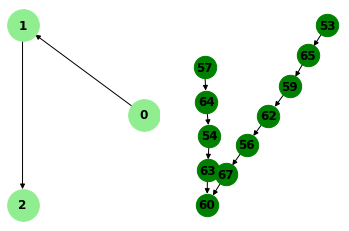

In [2]:
#distance
# lanelet_id
#adj_left=None, adj_left_same_direction=None, adj_right=None, ad_right_same_direction=None, 
#predecessor, succesor
#line_marking_right_vertices

########## Sample Usage CreateLaneletGraph ##########
##################################################
from GraphBasedDistanceMeasure import CreateLaneletGraph
options1 = {
    'node_color': 'lightgreen',
    'node_size': 1000,
    'width': 1,
}
options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

import networkx as nx
lanelets = scenario.lanelet_network.lanelets
G = CreateLaneletGraph(lanelets)
plt.subplot(121)
nx.draw_circular(G.nodes[lanelets[0].lanelet_id]['graph'], with_labels=True, font_weight='bold', **options1) #for reaching the graph of lanelet with id i
plt.subplot(122)
nx.draw_kamada_kawai(G,with_labels=True, font_weight='bold', **options2)
plt.show()

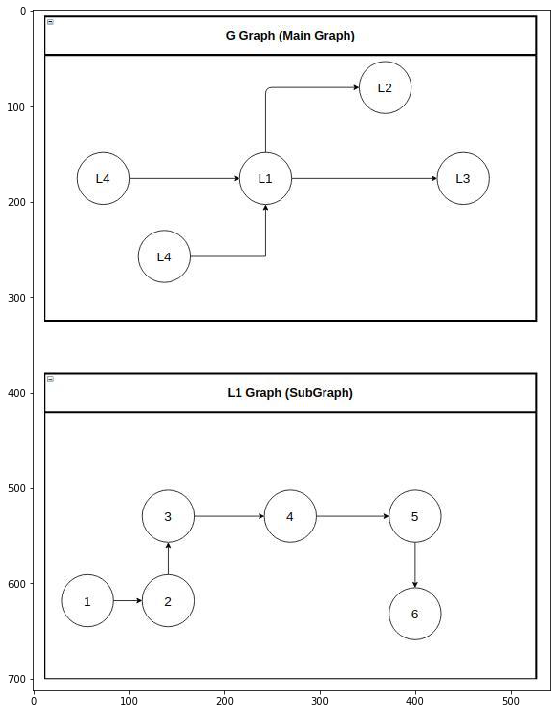

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = (25.0, 12.5) # set default size of plots
img=mpimg.imread('SampleGraph.jpg')
imgplot = plt.imshow(img)
plt.show()


[53, 65, 54, 64, 63, 56, 62, 67, 57, 59, 60]


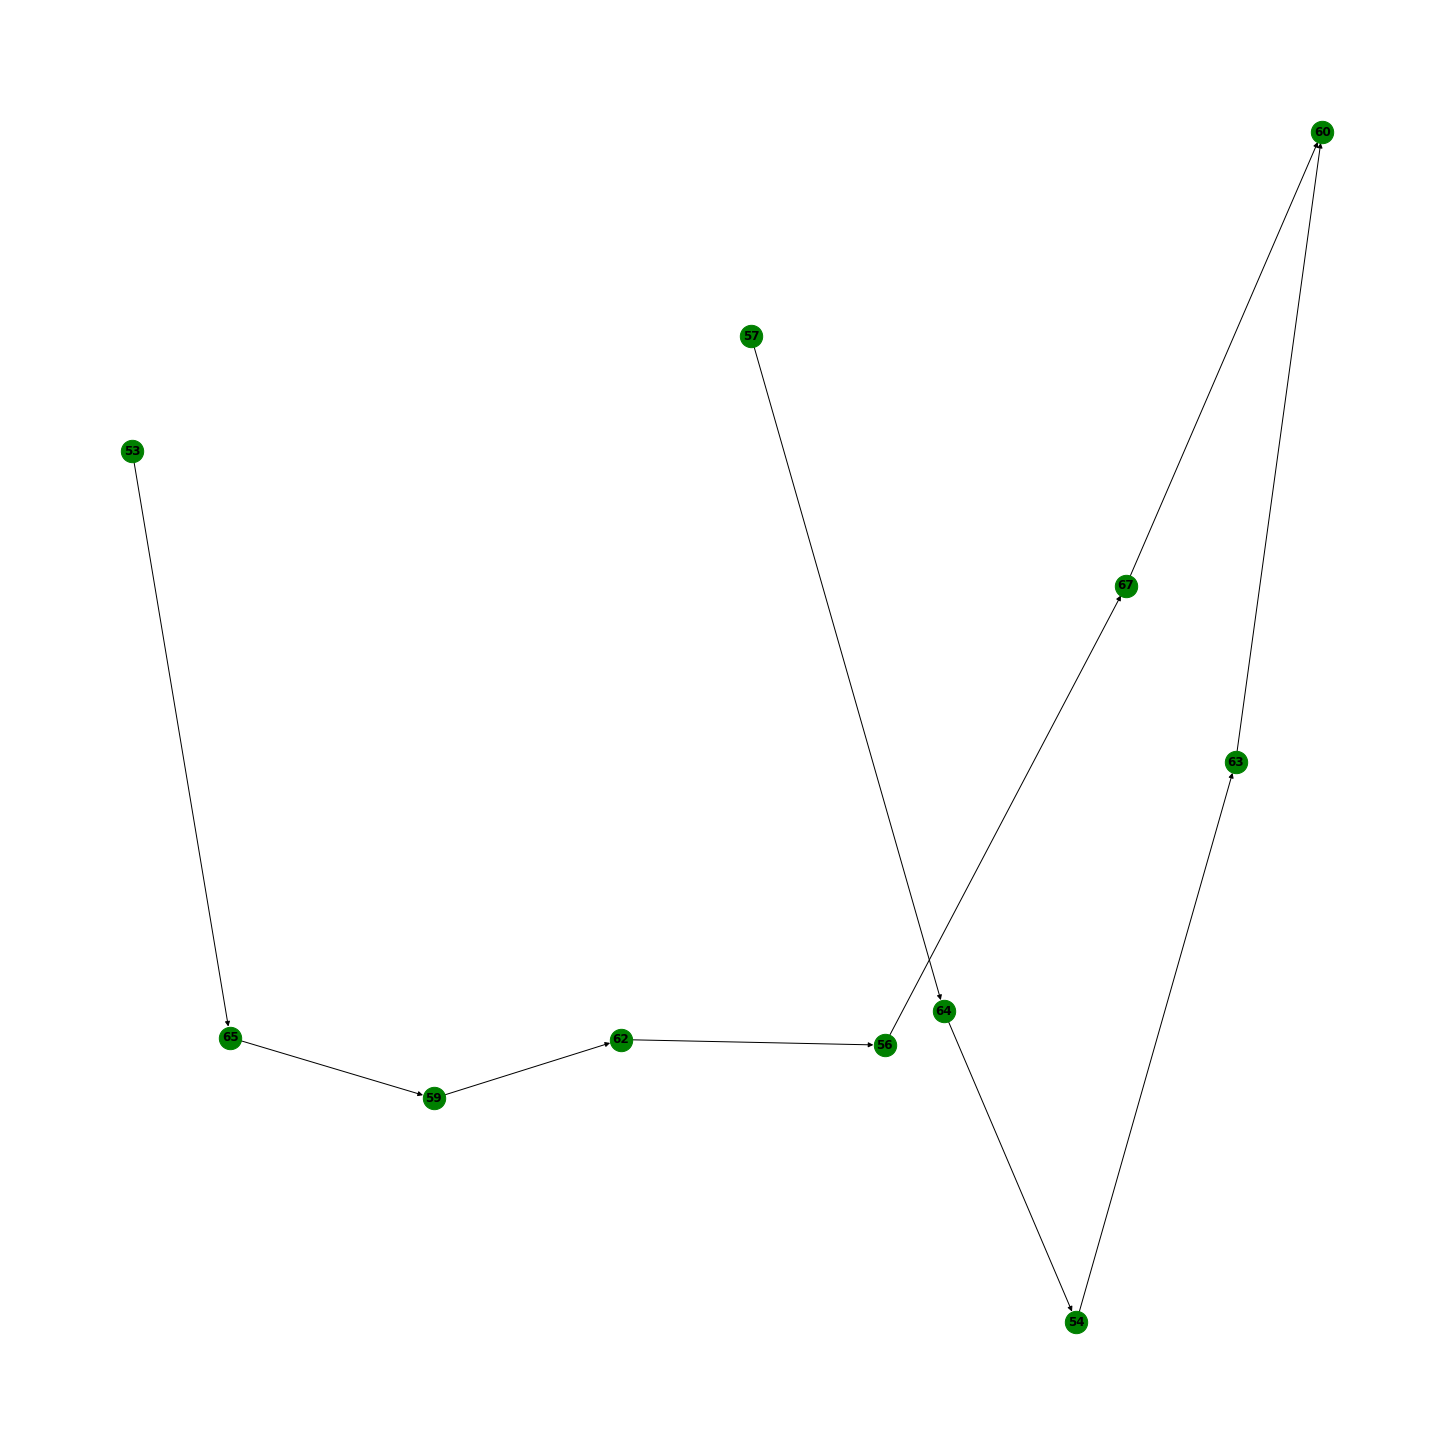

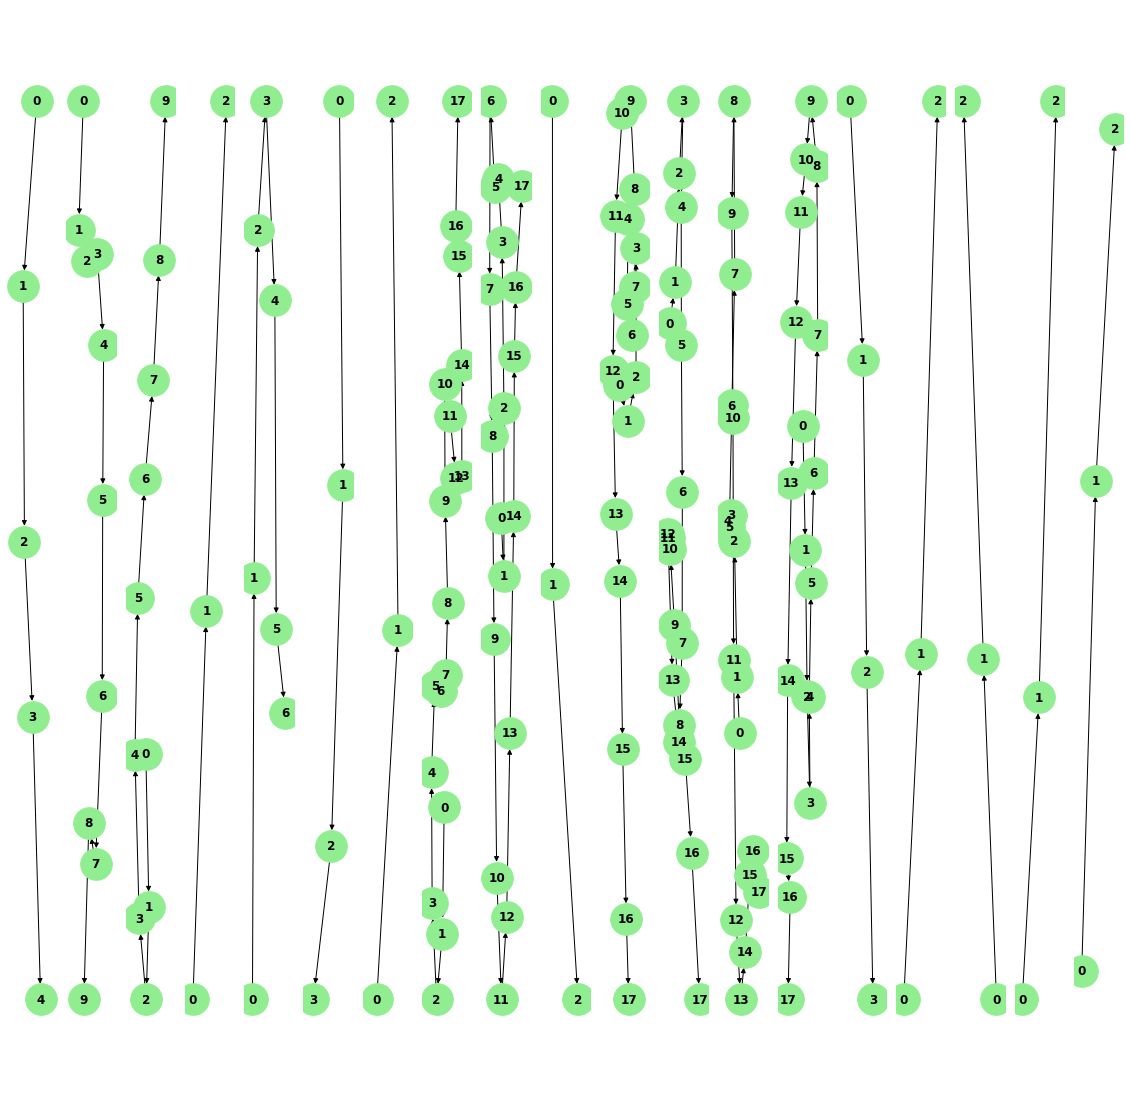

In [4]:
from GraphBasedDistanceMeasure import V
print(G.nodes)
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
nx.draw(G,with_labels=True, font_weight='bold', **options2)
plt.show()
i = 1
for o in scenario.obstacles:
    #print(lanelet)
    plt.subplot(1, len(scenario.obstacles), i)
    lanelet_of_obstacle, node = V(o)
    nx.draw(G.nodes[lanelet_of_obstacle]['graph'], with_labels=True, font_weight='bold', **options1) #for reaching the graph of lanelet with id i
    i = i+1
plt.show()

#### 3) Set Initial Vertex of the Given Vehicles ( v(c0)):

According to paper we have just **initial states** of the vehicles so we just use the **initial states** of the vehicles in the xml file. We will set vehicle's initial states via a method called **setInitialVertextoVehicles** with respect to paper.

In [5]:
#######  SAMPLE USAGE  #######
##########  Vertex  ##########
##############################
from GraphBasedDistanceMeasure import V

obstacles = scenario.obstacles
for o in obstacles:
    print("obstacle id: ", o.obstacle_id)
    lanelet, node= V(o)
    print("initial lanelet: ", lanelet, "| initial node of the obstacle in the lanelet: ", node)
    print("_______________________")
    

obstacle id:  35
initial lanelet:  67 | initial node of the obstacle in the lanelet:  3
_______________________
obstacle id:  39
initial lanelet:  60 | initial node of the obstacle in the lanelet:  5
_______________________
obstacle id:  311
initial lanelet:  60 | initial node of the obstacle in the lanelet:  0
_______________________
obstacle id:  313
initial lanelet:  62 | initial node of the obstacle in the lanelet:  0
_______________________
obstacle id:  315
initial lanelet:  63 | initial node of the obstacle in the lanelet:  2
_______________________
obstacle id:  317
initial lanelet:  64 | initial node of the obstacle in the lanelet:  2
_______________________
obstacle id:  318
initial lanelet:  59 | initial node of the obstacle in the lanelet:  2
_______________________
obstacle id:  319
initial lanelet:  57 | initial node of the obstacle in the lanelet:  13
_______________________
obstacle id:  320
initial lanelet:  57 | initial node of the obstacle in the lanelet:  16
_______

In [6]:
###################### SAMPLE USAGE ############################
##########  R(v(c)): reachable points of an obstacle  ##########
################################################################
from GraphBasedDistanceMeasure import V, R   
for o in obstacles:
    v1, node = V(o)
    print("vehicle id: ", o.obstacle_id)
    print("initial lanelet id: ", v1)
    print("initial node of the initial lanelet: ", node)
    print()
    print("R(v1): ", R(v1))
    print("______________________________________________")

vehicle id:  35
initial lanelet id:  67
initial node of the initial lanelet:  3

R(v1):  {67: [60]}
______________________________________________
vehicle id:  39
initial lanelet id:  60
initial node of the initial lanelet:  5

R(v1):  {60: []}
______________________________________________
vehicle id:  311
initial lanelet id:  60
initial node of the initial lanelet:  0

R(v1):  {60: []}
______________________________________________
vehicle id:  313
initial lanelet id:  62
initial node of the initial lanelet:  0

R(v1):  {62: [56], 56: [67], 67: [60]}
______________________________________________
vehicle id:  315
initial lanelet id:  63
initial node of the initial lanelet:  2

R(v1):  {63: [60]}
______________________________________________
vehicle id:  317
initial lanelet id:  64
initial node of the initial lanelet:  2

R(v1):  {64: [54], 54: [63], 63: [60]}
______________________________________________
vehicle id:  318
initial lanelet id:  59
initial node of the initial lanelet: 

In [7]:
#################### SAMPLE USAGE #########################
########## M(v(c0), v(c1)) = R(v(c0)) n R (v(c1)) ##########
###########################################################
#c0 = obstacles[3]
c0 = obstacles[3]  # obstacle 1 ve 2 icin calis bunlar son laneletteler. it can cause a bug
c1 = obstacles[6]
#c1 = obstacles[6]
v1, node1 = V(c0) 
v2, node2 = V(c1)
print("initial 1:", v1, node1)
print("initial 2:", v2, node2)
r1, r2 = dict(), dict()
r1 = R(v1)
r2 = R(v2)
# also check initial states because they can meet at last lanelet

print("reachable points 1: ", r1)
print("reachable points 2: ", r2)
common_vertices = []
"""
for key in r1.keys():
    for k in r2.keys():
        if k == key or k == r1[key][0]:
            common_vertices.append(k)
        if r2[k][0] == key or r2[k][0] == r1[key][0]:
            common_vertices.append(r2[k][0])
            
common_vertices = list(set(common_vertices)) # make unique the list
print(common_vertices)
"""

initial 1: 62 0
initial 2: 59 2
reachable points 1:  {62: [56], 56: [67], 67: [60]}
reachable points 2:  {59: [62], 62: [56], 56: [67], 67: [60]}


'\nfor key in r1.keys():\n    for k in r2.keys():\n        if k == key or k == r1[key][0]:\n            common_vertices.append(k)\n        if r2[k][0] == key or r2[k][0] == r1[key][0]:\n            common_vertices.append(r2[k][0])\n            \ncommon_vertices = list(set(common_vertices)) # make unique the list\nprint(common_vertices)\n'

In [8]:
from GraphBasedDistanceMeasure import M
vm = M(v1,v2)
print(vm)

62


In [9]:
####################### SAMPLE USAGE ##############################
########## Ps(v(c1), vm ) shortest path from v(c1) to vm ##########
###################################################################
from GraphBasedDistanceMeasure import P
v1 = V(c0)[0]
v2 = V(c1)[0]
vm = M(v1, v2)

#v1, v2, vm

ps1 = P(v1, vm)
ps2 = P(v2, vm)

print("ps1:", ps1, "ps2:", ps2)





ps1: [62] ps2: [59, 62]


In [10]:
####################### SAMPLE USAGE ######################################
########## D(P1, P2) returns the maximum distance for P1 and P2  ##########
###########################################################################
from GraphBasedDistanceMeasure import D
distance = D(c0, c1)
print(distance)

23.79510329836296


In [31]:

v1 = V(c0)[0]
v2 = V(c1)[0]
vm = M(v1, v2)

print("initial v1\t| node1 \t| node_distance | lanelet_distance: ")
print(v1, "\t\t| ", node1, "\t\t| ", int(G.nodes[v1]['graph'].nodes[node1]['distance']), "\t\t| ", int(G.nodes[v1]['weight']))
print(v2, "\t\t| ", node2, "\t\t| ", int(G.nodes[v2]['graph'].nodes[node2]['distance']), "\t\t| ", int(G.nodes[v2]['weight']))
print("meeting vertex vm: ", vm)

ps1 = P(v1, vm)
ps2 = P(v2, vm)
#for ps1:

print()
print("shortest paths to vm from v1:\t", ps1)
for lanelet in ps1:
    print(" \t\t\t\t lanelet", lanelet, " weight: ", int(G.nodes[lanelet]['weight']))
print("shortest paths to vm from v2:\t", ps2)
for lanelet in ps2:
    print(" \t\t\t\t lanelet", lanelet, " weight: ", int(G.nodes[lanelet]['weight']))
print("distance between v1 and v2  :\t", distance)


initial v1	| node1 	| node_distance | lanelet_distance: 
62 		|  0 		|  0 		|  23
59 		|  2 		|  149 		|  149
meeting vertex vm:  62

shortest paths to vm from v1:	 [62]
 				 lanelet 62  weight:  23
shortest paths to vm from v2:	 [59, 62]
 				 lanelet 59  weight:  149
 				 lanelet 62  weight:  23
distance between v1 and v2  :	 23.79510329836296


In [32]:
#check is setting weight is correct

for lanelet in lanelets:
    print(lanelet.lanelet_id, ":\t", lanelet.distance[-1])
    print("_________")
    print("\t", lanelet.distance, "\n")
print("__________________________________________________")
for L_id in G.nodes:
    print(L_id, G.nodes[L_id]['adj_lanelet'], ": ", G.nodes[L_id]['weight'])

53 :	 68.69710141592583
_________
	 [ 0.         34.34855156 68.69710142] 

54 :	 0.24699684907189093
_________
	 [0.         0.12108329 0.24699685] 

55 :	 0.21368360226738203
_________
	 [0.         0.08014495 0.2136836 ] 

56 :	 10.278143690568164
_________
	 [ 0.          5.13905577 10.27814369] 

57 :	 240.3074645043466
_________
	 [  0.          13.54565514  28.0947373   36.62314076  44.64964255
  52.67620469  60.20095273  67.72580752  76.75575169  86.28763216
  98.32811144 124.41654351 142.9794331  185.62431238 202.68196687
 216.72930233 229.27151498 240.3074645 ] 

58 :	 241.26562337636122
_________
	 [  0.          13.56746045  28.21070688  36.83678593  44.95952541
  53.08960316  60.71783011  68.33926847  77.45990497  87.07382206
  99.16811218 125.31085052 143.93375863 186.62757875 203.67542767
 217.69168598 230.22335773 241.26562338] 

59 :	 149.18408061380268
_________
	 [  0.          74.59207357 149.18408061] 

60 :	 86.46974299101275
_________
	 [ 0.          9.99647929 1

In [34]:
#Lets create a samle graph for test P (finding shortest path) and D (finding distance)
from GraphBasedDistanceMeasure import P, D
import networkx as nx
test_G = nx.DiGraph()
test_G.add_edge(1,2,weight = 673)
test_G.add_edge(1,3,weight = 201)
test_G.add_edge(2,4,weight = 96)
test_G.add_edge(3,4,weight = 96)
test_G.add_edge(1,4,weight = 96)
print(nx.shortest_path(test_G, source = 1, target = 4, weight = 'weight'))

[1, 4]
